China v US Case Study:

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Load US risk-free rate

df_us_treasury_cpi = pd.read_csv('data/usa/us treasury_cpi.csv')
df_us_treasury_cpi

,caldt,b1ret,t90ret,cpiret
0,1929-03-28,NaN,0.010424,-0.005848
1,1929-06-29,NaN,0.012697,0.005882
2,1929-09-30,NaN,0.011683,0.011696
3,1929-12-31,NaN,0.013535,-0.005780
4,1930-03-31,NaN,0.008532,-0.017442
...,...,...,...,...
347,2015-12-31,-0.002149,0.000209,-0.005968
348,2016-03-31,0.004291,0.000758,0.006794
349,2016-06-30,0.003261,0.000846,0.012119
350,2016-09-30,0.000035,0.001092,0.001701


In [3]:
# Load China risk-free rate data

df_ch_risk_free = pd.read_csv('data/china/china risk free.csv')
df_ch_risk_free

,Clsdt,Nrrdata,Nrrwkdt
0,1990-04-15,10.08,0.1849
1,1990-08-21,8.64,0.1595
2,1990-12-19,8.64,0.1595
3,1990-12-20,8.64,0.1595
4,1990-12-21,8.64,0.1595
...,...,...,...
11698,2022-12-27,1.50,0.0286
11699,2022-12-28,1.50,0.0286
11700,2022-12-29,1.50,0.0286
11701,2022-12-30,1.50,0.0286


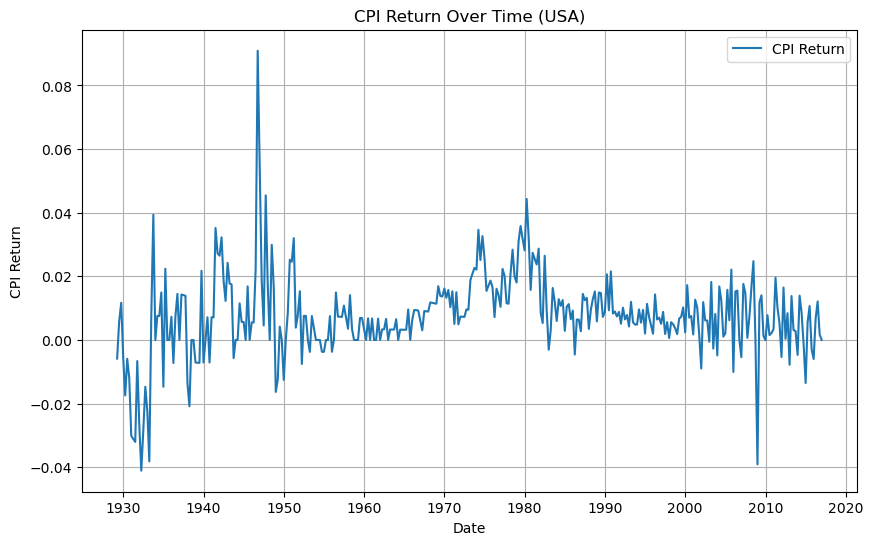

In [4]:
#Plotting USA cpi
df_us_treasury_cpi['caldt'] = pd.to_datetime(df_us_treasury_cpi['caldt'])
plt.figure(figsize=(10, 6))
plt.plot(df_us_treasury_cpi['caldt'], df_us_treasury_cpi['cpiret'], label='CPI Return')
plt.xlabel('Date')
plt.ylabel('CPI Return')
plt.title('CPI Return Over Time (USA)')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
df_ch_risk_free['Clsdt'] = pd.to_datetime(df_ch_risk_free['Clsdt'])

df_ch_risk_free['Nrrdata'] = df_ch_risk_free['Nrrdata'] / 100
df_us_treasury_cpi['annualized_t90ret'] = (1 + df_us_treasury_cpi['t90ret'])**(365/90) - 1

In [6]:
df_ch_risk_free.head(5)

,Clsdt,Nrrdata,Nrrwkdt
0,1990-04-15,0.1008,0.1849
1,1990-08-21,0.0864,0.1595
2,1990-12-19,0.0864,0.1595
3,1990-12-20,0.0864,0.1595
4,1990-12-21,0.0864,0.1595


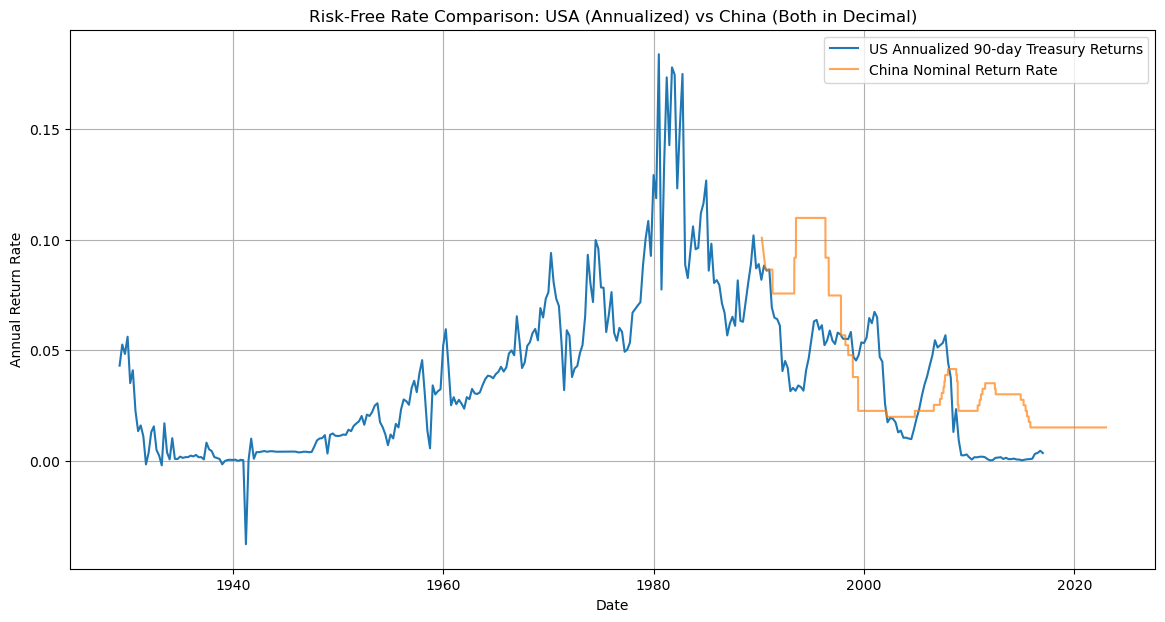

In [7]:
plt.figure(figsize=(14, 7))

plt.plot(df_us_treasury_cpi['caldt'], df_us_treasury_cpi['annualized_t90ret'], label='US Annualized 90-day Treasury Returns')

# Plotting China nominal return rate data (as decimals)
plt.plot(df_ch_risk_free['Clsdt'], df_ch_risk_free['Nrrdata'], label='China Nominal Return Rate', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Annual Return Rate')
plt.title('Risk-Free Rate Comparison: USA (Annualized) vs China (Both in Decimal)')
plt.legend()
plt.grid(True)
plt.show()

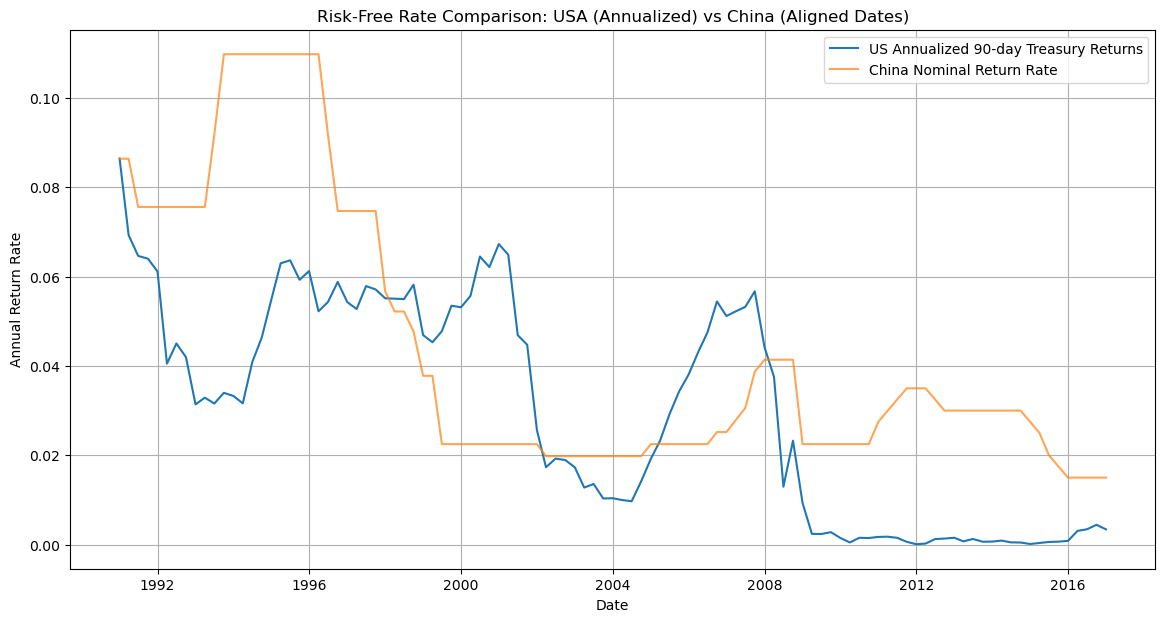

In [8]:
merged_data = pd.merge(df_us_treasury_cpi[['caldt', 'annualized_t90ret']], 
                       df_ch_risk_free[['Clsdt', 'Nrrdata']], 
                       left_on='caldt', 
                       right_on='Clsdt')
merged_data.drop(columns=['Clsdt'], inplace=True)
plt.figure(figsize=(14, 7))
plt.plot(merged_data['caldt'], merged_data['annualized_t90ret'], label='US Annualized 90-day Treasury Returns')
plt.plot(merged_data['caldt'], merged_data['Nrrdata'], label='China Nominal Return Rate', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Annual Return Rate')
plt.title('Risk-Free Rate Comparison: USA (Annualized) vs China (Aligned Dates)')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
correlation = merged_data['annualized_t90ret'].corr(merged_data['Nrrdata'])

print("Correlation between US and China risk-free rates:", correlation)

Correlation between US and China risk-free rates: 0.5377749368001928
